## Stream functions for planar stagnation flow 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


### Potential stagnation flow

In [2]:
def psi(x,y):
#    f = np.zeros((len(r),len(th)))
#    f[ r > 1 ] = (r-1/r)*np.sin(th)
    return x*y 



In [3]:
deltax=0.1
deltay=0.1
L=3
x = np.arange(-L/2, L/2 , deltax)
y  =np.arange(   0,  L  , deltay)
X, Y = np.meshgrid(x, y)

In [4]:
Z = psi(X  ,  Y  )

Text(0.5,1,'Streamlines')

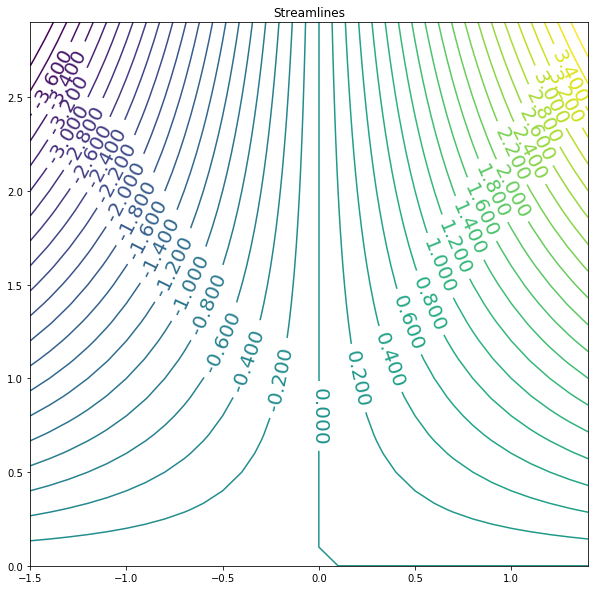

In [5]:
height=10
fig, ax = plt.subplots(figsize=(1*height, height) )
CS = ax.contour(X, Y, Z, levels= np.arange(-4, 4, 0.2) )
ax.clabel(CS, inline=1, fontsize=20)
ax.set_title('Streamlines')


In [6]:
def phi(x,y):
    return (x**2 - y**2)/2 


Text(0.5,1,'Potential')

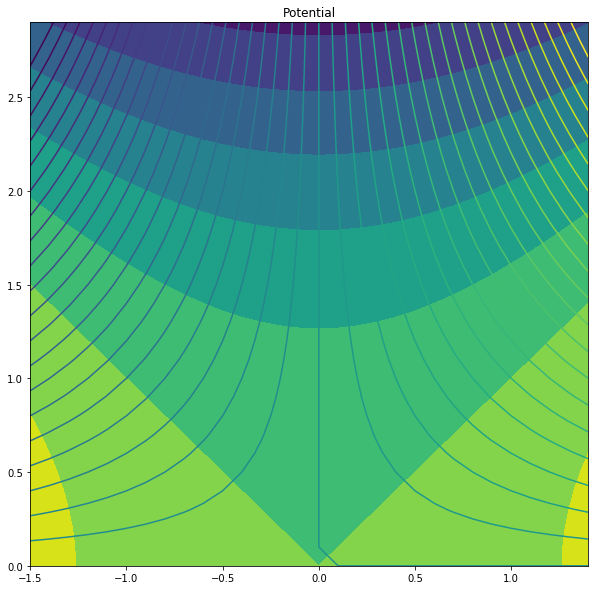

In [7]:
fi=  phi(X,Y)

height=10
fig, ax = plt.subplots(figsize=(1*height, height) )
CS = ax.contourf(X, Y, fi ) # levels= np.arange(-4, 4, 0.2) )
#ax.clabel(CS, inline=1, fontsize=20)
CS2 = ax.contour(X, Y, Z, levels= np.arange(-4, 4, 0.2) )
ax.set_title('Potential')


In [8]:
def press(x,y):
    return -0.5*(x**2 + y**2 )

Text(0.5,1,'Pressure')

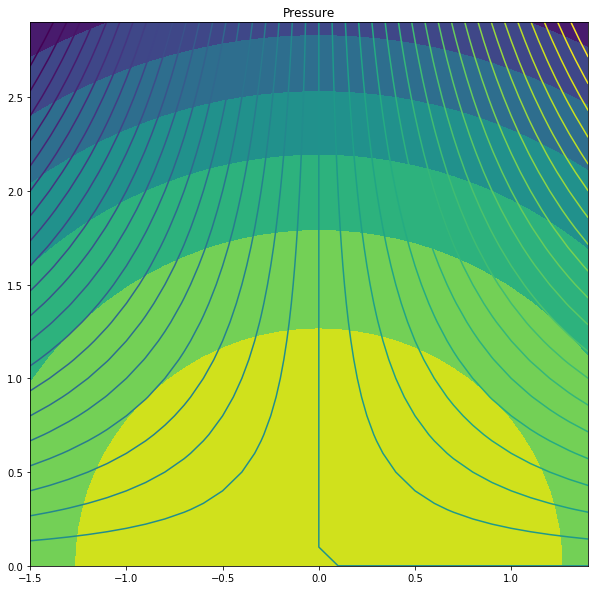

In [9]:
pp=  press(X,Y)

height=10
fig, ax = plt.subplots(figsize=(1*height, height) )
CS = ax.contourf(X, Y, pp ) # levels= np.arange(-4, 4, 0.2) )
CS2 = ax.contour(X, Y, Z, levels= np.arange(-4, 4, 0.2) )
#ax.clabel(CS, inline=1, fontsize=20)
ax.set_title('Pressure')

In [10]:
fig.savefig('stagnation_potential_streamlines.eps')

### Hiemenz flow

In [11]:
from scipy.integrate import solve_ivp

In [17]:
def g(t, y):
    g0=y[0]
    g1=y[1]
    g2=y[2]

    return [
        g1,
        g2,
        g1**2 - 1 - g0 * g2
    ]

#Lint= 5 ## use this number to guess g2(0)
#sol = solve_ivp( g, [0, Lint ] , [ 0 , 0 , 1.234 ] , t_eval = np.linspace(0,5,30) )

# run this when guess is found.-
Lint = L
g2_0 = 1.234

sol = solve_ivp( g, [0, Lint ] , [ 0 , 0 , 1.234 ] , t_eval = y )



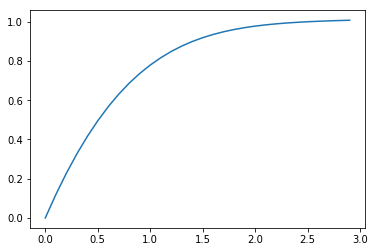

In [18]:
plt.plot( sol.t, sol.y[1] )

In [19]:
g=sol.y[0]
gp=sol.y[1]  # handy for velocities
gpp=sol.y[2]

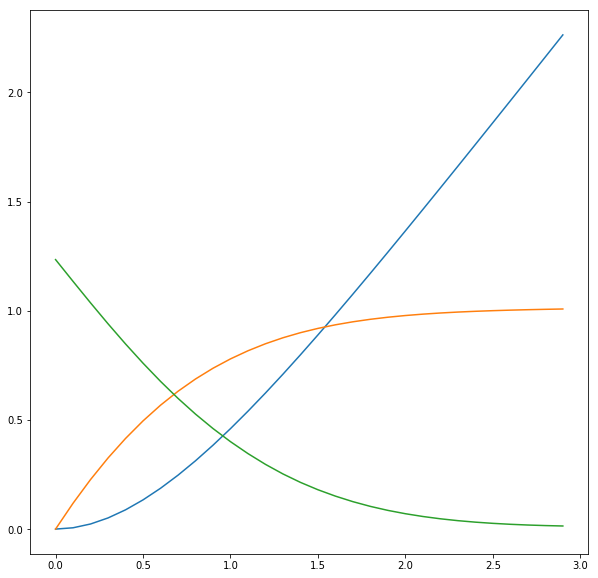

In [20]:
height=10
fig, ax = plt.subplots(figsize=(1*height, height) )
ax.plot(y , g , y , gp , y , gpp)

In [21]:
fig.savefig('stagnation_functions.eps')

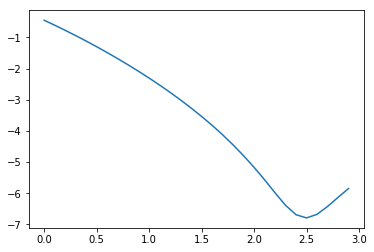

In [22]:
plt.plot(y , np.log( abs(g - (y - 0.64)) ) )

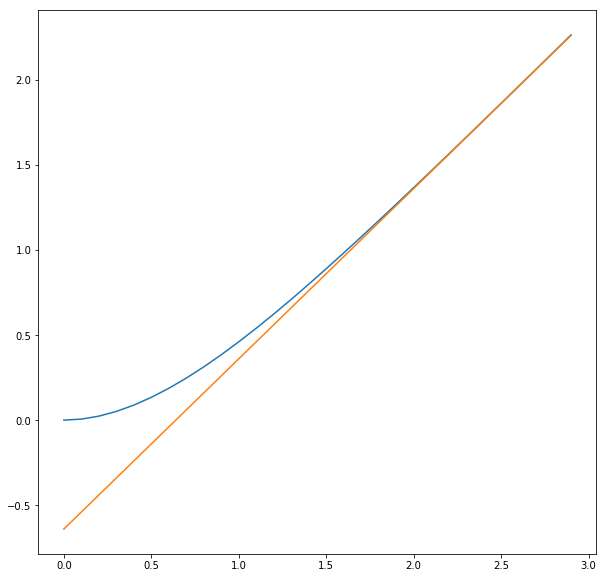

In [23]:
height=10
fig, ax = plt.subplots(figsize=(1*height, height) )
ax.plot(y , g ,  y ,  y - 0.64 )

In [24]:
fig.savefig('stagnation_function_disp.eps')

In [29]:
%matplotlib notebook

Finding out delta, such that g'(delta) = 0.99. This is "the" thickness of the boundary layer (one possible definition)

<IPython.core.display.Javascript object>


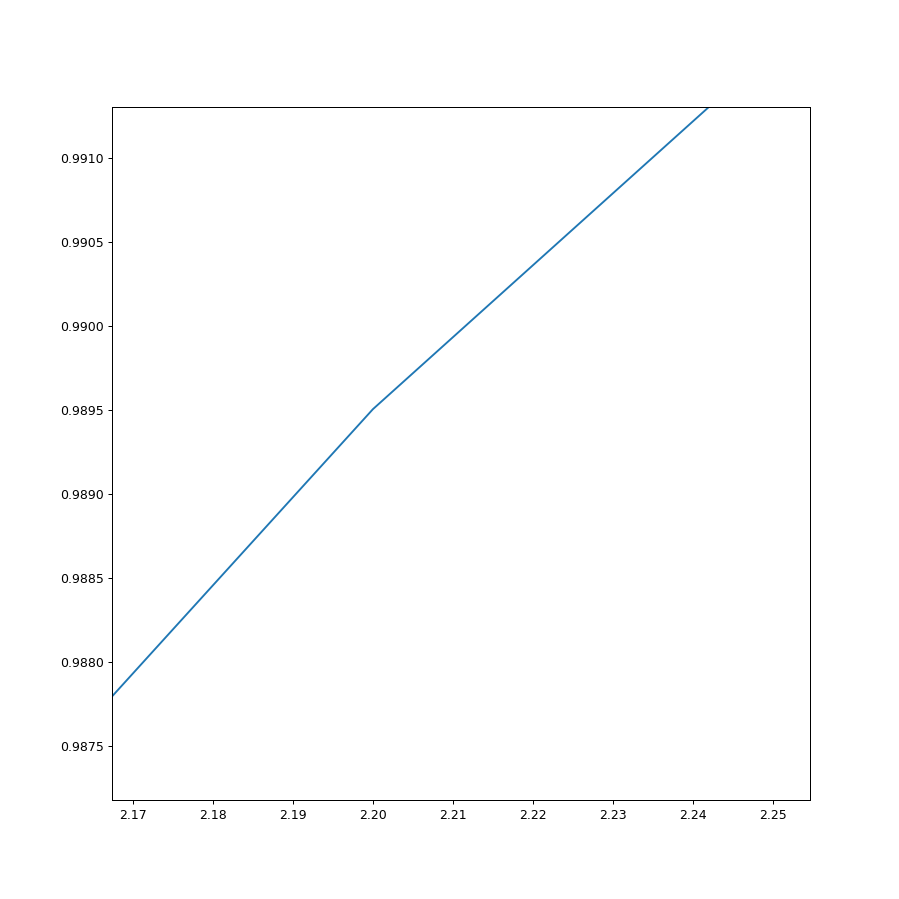

In [30]:
height=10
fig, ax = plt.subplots(figsize=(1*height, height) )
ax.plot(y , gp )

In [28]:
%matplotlib inline

In [31]:
X, G = np.meshgrid(x, g)

In [32]:
Z = psi(X  ,  G )

Text(0.5,1,'Streamlines')

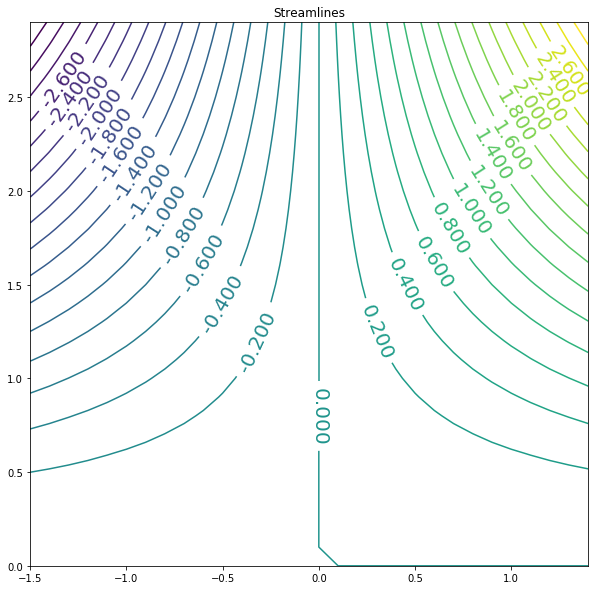

In [33]:
height=10
fig, ax = plt.subplots(figsize=(1*height, height) )
CS = ax.contour(X, Y , Z, levels= np.arange(-4, 4, 0.2) )
ax.clabel(CS, inline=1, fontsize=20)
ax.set_title('Streamlines')


In [34]:
def press_v(x , g , gp):
    return -0.5*( x**2 + g**2 ) - gp

In [35]:
X, GP = np.meshgrid(x, gp )

Text(0.5,1,'Pressure')

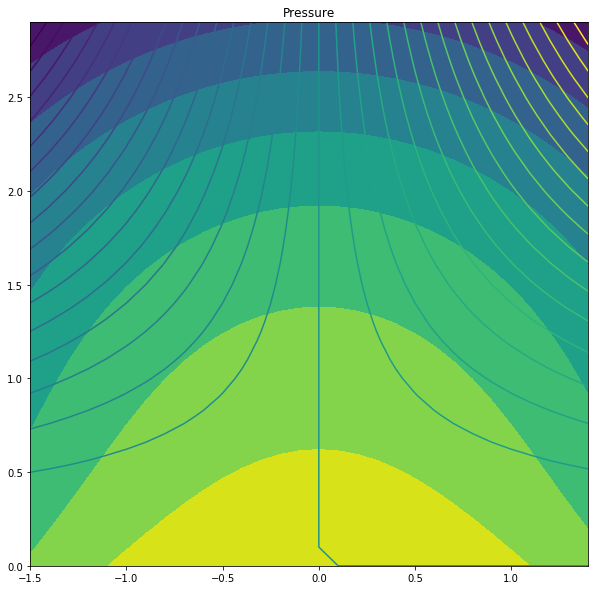

In [36]:
ppv=  press_v(X,G,GP)

height=10
fig, ax = plt.subplots(figsize=(1*height, height) )
CS = ax.contourf(X, Y, ppv ) # levels= np.arange(-4, 4, 0.2) )
CS2 = ax.contour(X, Y, Z, levels= np.arange(-4, 4, 0.2) )
#ax.clabel(CS, inline=1, fontsize=20)
ax.set_title('Pressure')

In [37]:
fig.savefig('stagnation_viscous_streamlines.eps')

In [38]:
#fig.savefig('stagnation_viscous_pressure.eps')

Text(0.5,1,'Pressure: potential vs viscous')

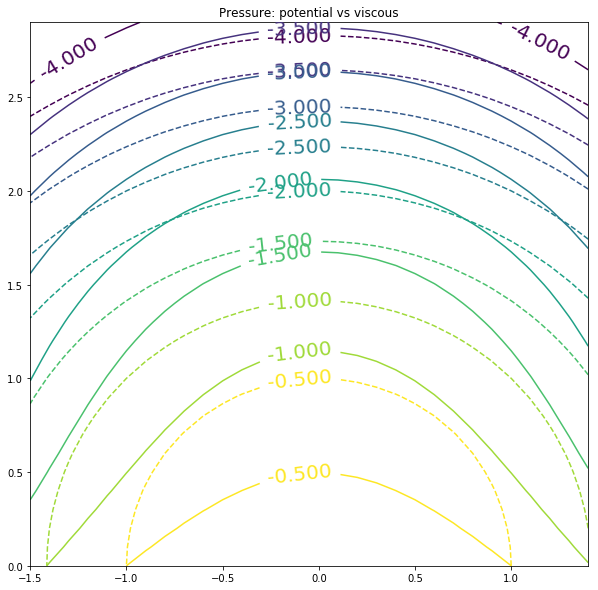

In [39]:

height=10
fig, ax = plt.subplots(figsize=(1*height, height) )
CS  = ax.contour(X, Y, pp, linestyles='dashed' , levels= np.arange(-4, 4, 0.5) )
CS2 = ax.contour(X, Y, ppv, levels= np.arange(-4, 4, 0.5) )
ax.clabel(CS, inline=1, fontsize=20)
ax.clabel(CS2, inline=1, fontsize=20)
ax.set_title('Pressure: potential vs viscous')


In [29]:
fig.savefig('stagnation_potential_viscous_pressures.eps')